In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
from random import sample

In [2]:
sample_log_file_1 = Path("/Users/tobiaochsner/Documents/Thesis/Validation/data/validation/yule-10-0_logs_mu-sigma.log")
sample_log_file_2 = Path("/Users/tobiaochsner/Documents/Thesis/Validation/data/validation/yule-10-0_logs_mu-sigma-beta-old-old.log")
reference_log_file = Path("/Users/tobiaochsner/Documents/Thesis/Validation/data/beast/yule-10-0.log")

In [3]:
NUM_PAIRS = 1000

In [4]:
sample_logs_1 = pd.read_csv(sample_log_file_1)
sample_logs_2 = pd.read_csv(sample_log_file_2)
reference_logs = pd.read_csv(reference_log_file, delimiter="\t", comment="#")

In [5]:
sample_logs_1.posterior = sample_logs_1.posterior.map(lambda x: np.log(x))
sample_logs_2.posterior = sample_logs_2.posterior.map(lambda x: np.log(x))

In [6]:
from scipy.stats import pearsonr

In [7]:
reference_logs

,Sample,posterior,likelihood,prior,frequencies.A,frequencies.C,frequencies.G,frequencies.T,kappa,shape,phi.height,phi.treeLength,D.treeLikelihood
0,0,-766.653550,-786.446380,19.792830,0.082496,0.087306,0.503060,0.327138,1.514836,0.303652,0.057032,0.323174,-786.446380
1,500,-764.878727,-784.119109,19.240382,0.082496,0.077155,0.503060,0.337289,1.514836,0.341800,0.065461,0.328163,-784.119109
2,1000,-766.268813,-784.980375,18.711562,0.082496,0.077155,0.503060,0.337289,1.514836,0.482655,0.069701,0.330046,-784.980375
3,1500,-769.386591,-785.705998,16.319407,0.082496,0.077155,0.503060,0.337289,1.514836,0.562055,0.088002,0.411168,-785.705998
4,2000,-762.633653,-782.556717,19.923064,0.082496,0.077155,0.503060,0.337289,1.767299,0.291888,0.048546,0.299156,-782.556717
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34996,17498000,-767.217109,-786.743502,19.526394,0.098006,0.089889,0.556225,0.255879,1.629897,0.545381,0.059420,0.308046,-786.743502
34997,17498500,-769.530923,-787.410727,17.879803,0.098006,0.095362,0.556225,0.250407,1.834068,0.613666,0.079509,0.363289,-787.410727
34998,17499000,-770.275001,-790.209471,19.934470,0.098006,0.095362,0.456633,0.350000,1.560493,0.453568,0.072858,0.337141,-790.209471
34999,17499500,-766.269817,-784.841193,18.571376,0.098006,0.095362,0.529023,0.277609,1.384951,0.210328,0.083833,0.390271,-784.841193


In [8]:
pearsonr(reference_logs.posterior, sample_logs_1.posterior), pearsonr(reference_logs.posterior, sample_logs_2.posterior)

(PearsonRResult(statistic=np.float64(0.392075465518501), pvalue=np.float64(0.0)),
 PearsonRResult(statistic=np.float64(0.3321503943346965), pvalue=np.float64(0.0)))

<Axes: xlabel='posterior', ylabel='posterior'>

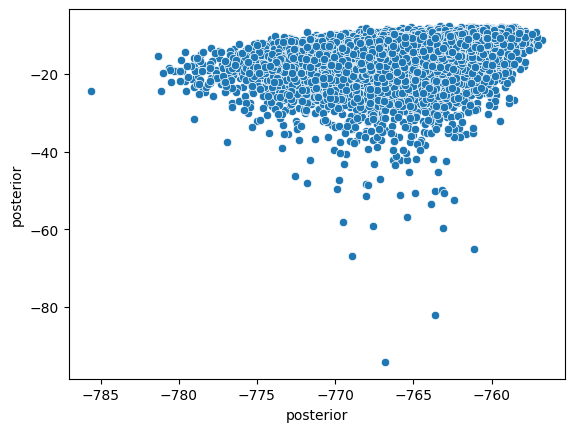

In [9]:
sns.scatterplot(
    x=reference_logs.posterior,
    y=sample_logs_1.posterior,
)

<Axes: xlabel='posterior', ylabel='posterior'>

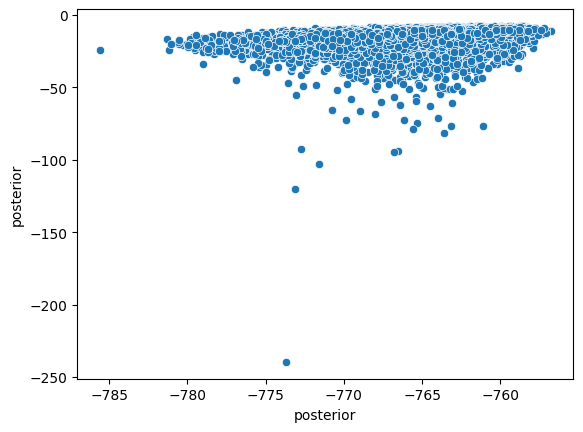

In [10]:
sns.scatterplot(
    x=reference_logs.posterior,
    y=sample_logs_2.posterior,
)